## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,m,TagName,Unnamed: 2
2421,2023-02-01 00:00:00,php,2582
2422,2023-02-01 00:00:00,python,16262
2423,2023-02-01 00:00:00,r,3851
2424,2023-02-01 00:00:00,ruby,343
2425,2023-02-01 00:00:00,swift,1337


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2426, 3)

In [6]:
df.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [7]:
df.rename(columns= {'m':'DATE', 'TagName':'TAG', 'Unnamed: 2':'POSTS'}, inplace=True)

In [8]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

**Challenge**: Count the number of entries in each column of the dataframe

In [9]:
df.tail()

,DATE,TAG,POSTS
2421,2023-02-01 00:00:00,php,2582
2422,2023-02-01 00:00:00,python,16262
2423,2023-02-01 00:00:00,r,3851
2424,2023-02-01 00:00:00,ruby,343
2425,2023-02-01 00:00:00,swift,1337


In [10]:
df.tail()

,DATE,TAG,POSTS
2421,2023-02-01 00:00:00,php,2582
2422,2023-02-01 00:00:00,python,16262
2423,2023-02-01 00:00:00,r,3851
2424,2023-02-01 00:00:00,ruby,343
2425,2023-02-01 00:00:00,swift,1337


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [12]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,42291
c,393347
c#,1581543
c++,788605
delphi,50579
go,67739
java,1886654
javascript,2474719
perl,67514


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [13]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,175,175
c,175,175
c#,176,176
c++,175,175
delphi,175,175
go,160,160
java,175,175
javascript,175,175
perl,175,175


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [15]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [16]:
df.DATE[1]

'2008-08-01 00:00:00'

## Data Manipulation



In [17]:
type(df.DATE[1])

str

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [18]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [20]:
reshape_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshape_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [21]:
reshape_df.shape

(176, 14)

In [23]:
reshape_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


In [24]:
reshape_df.count()

TAG
assembly      175
c             175
c#            176
c++           175
delphi        175
go            160
java          175
javascript    175
perl          175
php           175
python        175
r             173
ruby          175
swift         167
dtype: int64

In [25]:
reshape_df.fillna(0, inplace=True)

In [26]:
reshape_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0


In [31]:
reshape_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [27]:
import matplotlib.pyplot as plt

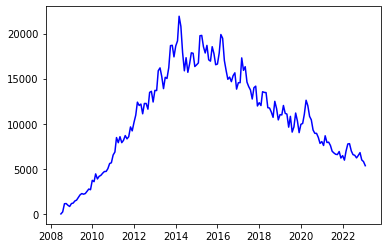

In [32]:
plt.plot(reshape_df['java'], color='b')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

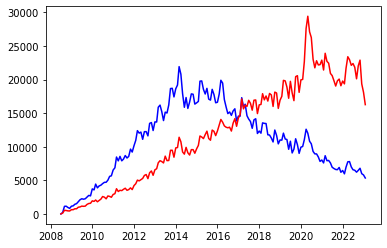

In [33]:
plt.plot(reshape_df['java'], color='b')
plt.plot(reshape_df['python'], color='r')

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

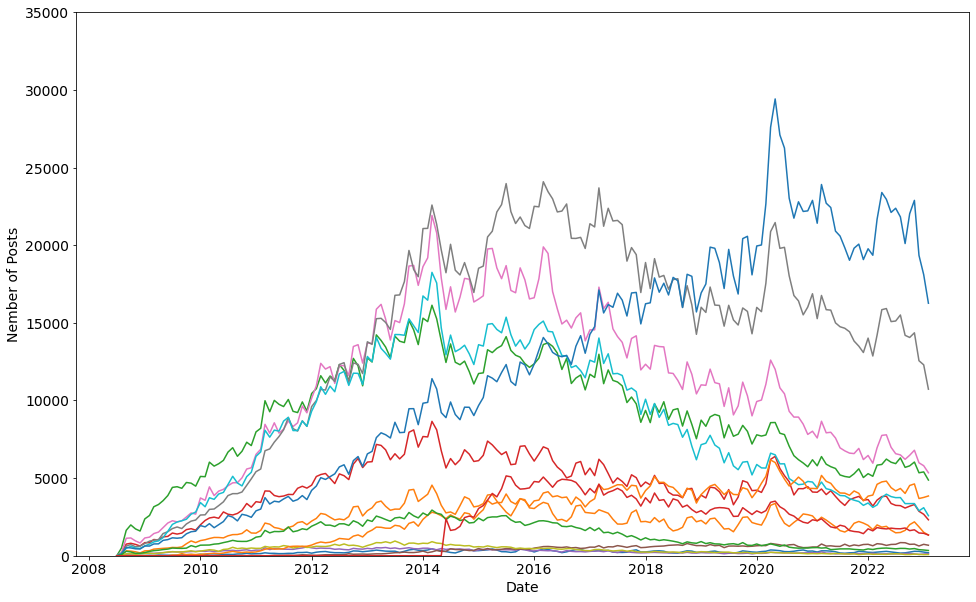

In [34]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Nember of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshape_df.columns:
  plt.plot(reshape_df.index, reshape_df[column])